random forest for refined dataset
- imputed with mean value of each column
- eliminate outliers and leverges after normalized

some observations:
- the model contructed by not normalized dataset is as good as the normalized dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
import joblib

import scipy

In [3]:
plt.rcParams["figure.figsize"] = (15, 10)

## load data

In [4]:
pth_data = '../processed_data/train_refine_not_norm_max.csv'
df_refine = pd.read_csv(pth_data)

In [5]:
df_refine

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
0,1.77,58.0,-1.0,18.513199,23.0,54.990,91.000000,63.000000,32.682000,0.128582,0.36,1.1,79.084
1,1.78,73.0,-1.0,23.040020,24.0,56.310,90.000000,81.000000,33.096000,0.079552,0.36,1.0,80.735
2,1.77,90.0,-1.0,28.727377,28.0,61.459,83.000000,78.000000,30.537000,0.422045,0.57,1.7,80.008
3,1.60,52.5,1.0,20.507812,24.0,44.681,88.158537,62.485294,32.559814,0.031869,0.61,1.7,78.033
4,1.60,52.5,1.0,20.507812,24.0,62.764,82.000000,39.000000,30.907000,-0.031865,0.54,1.0,76.464
5,1.77,90.0,-1.0,28.727377,28.0,61.638,91.000000,83.000000,33.250000,8.697113,0.36,1.1,81.023
6,1.77,58.0,-1.0,18.513199,23.0,55.272,87.000000,62.485294,32.915000,0.006857,0.36,1.0,79.480
7,1.77,58.0,-1.0,18.513199,23.0,50.237,99.000000,54.000000,31.588000,0.017909,0.36,1.3,76.725
8,1.77,90.0,-1.0,28.727377,28.0,60.389,67.000000,62.485294,31.013000,0.188456,0.36,1.1,79.480
9,1.77,58.0,-1.0,18.513199,23.0,53.132,106.000000,93.000000,33.790000,0.322940,0.36,1.3,80.845


In [6]:
df_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   height        44 non-null     float64
 1   weight        44 non-null     float64
 2   gender        44 non-null     float64
 3   bmi           44 non-null     float64
 4   age           44 non-null     float64
 5   rh            44 non-null     float64
 6   heart_rate    44 non-null     float64
 7   stress_level  44 non-null     float64
 8   skin_temp     44 non-null     float64
 9   eda           44 non-null     float64
 10  Clo           44 non-null     float64
 11  Act           44 non-null     float64
 12  env_temp      44 non-null     float64
dtypes: float64(13)
memory usage: 4.6 KB


## data process

### X & y

In [7]:
X_data = df_refine[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'Clo', 'Act']]

In [8]:
X_cols_name = X_data.columns

In [9]:
y_data = df_refine['env_temp']

### make training data and testing data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1208)

much better than the basic linear regression

## tuning hyperparameter
cross validation

### random search
Use the random grid to search for best hyperparameters (approximately)
- 5-fold cross validation

In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]

# Complexity parameter used for Minimal Cost-Complexity Pruning.
# ccp_alpha = [0.00001, 0.0005, 0.0001, 0.0005]
    
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [12]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 8, 16]}

In [13]:
rfr = RandomForestRegressor()

In [14]:
rfr_random = RandomizedSearchCV(estimator=rfr, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=5, 
                               verbose=2, 
                               random_state=1208, 
                               n_jobs=-1,
                               scoring='r2')

In [15]:
# Fit the random search model
# Use R^2 as score method
rfr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1208, scoring='r2', verbose=2)

In [16]:
rfr_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [17]:
rfr_random.best_score_

0.4459671130999279

### Grid Search
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.

In [18]:
param_grid = {
    'n_estimators': [1200, 1300, 1400, 1500, 1600],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 3, 4, 5],
    'max_depth': [1, 5, 10, 15, 20, None]
}

In [19]:
rfr = RandomForestRegressor()

In [20]:
grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = param_grid, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2,
                           scoring='r2')

In [21]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 13.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20, None],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             scoring='r2', verbose=2)

In [22]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [23]:
grid_search.best_score_

0.44959690830894516

### validate the result

In [24]:
best_params = grid_search.best_params_

In [25]:
rfr = RandomForestRegressor(random_state=1208)

In [26]:
rfr.set_params(**best_params)

RandomForestRegressor(max_features=5, n_estimators=1500, random_state=1208)

In [27]:
rfr_cv_mse = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [28]:
rfr_cv_mse

array([-0.71947685, -4.66551459, -2.72759707, -2.47007788, -1.1528546 ])

In [29]:
np.abs(rfr_cv_mse.mean())

2.347104197980009

In [30]:
rfr_cv_r2 = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)

In [31]:
rfr_cv_r2

array([ 0.81812609, -0.0410747 ,  0.2312907 ,  0.37731813,  0.77548182])

In [32]:
np.abs(rfr_cv_r2.mean())

0.43222840876995755

## final model

In [34]:
best_params = grid_search.best_params_

In [35]:
rfr_best = RandomForestRegressor(random_state=1208)
rfr_best.set_params(**best_params)

RandomForestRegressor(max_features=5, n_estimators=1500, random_state=1208)

In [36]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=1500, random_state=1208)

### save model

In [37]:
filename = './max_random_forest_model.sav'
joblib.dump(rfr_best, filename)

['./max_random_forest_model.sav']

## visualization
pick a tree from the forest to visualize

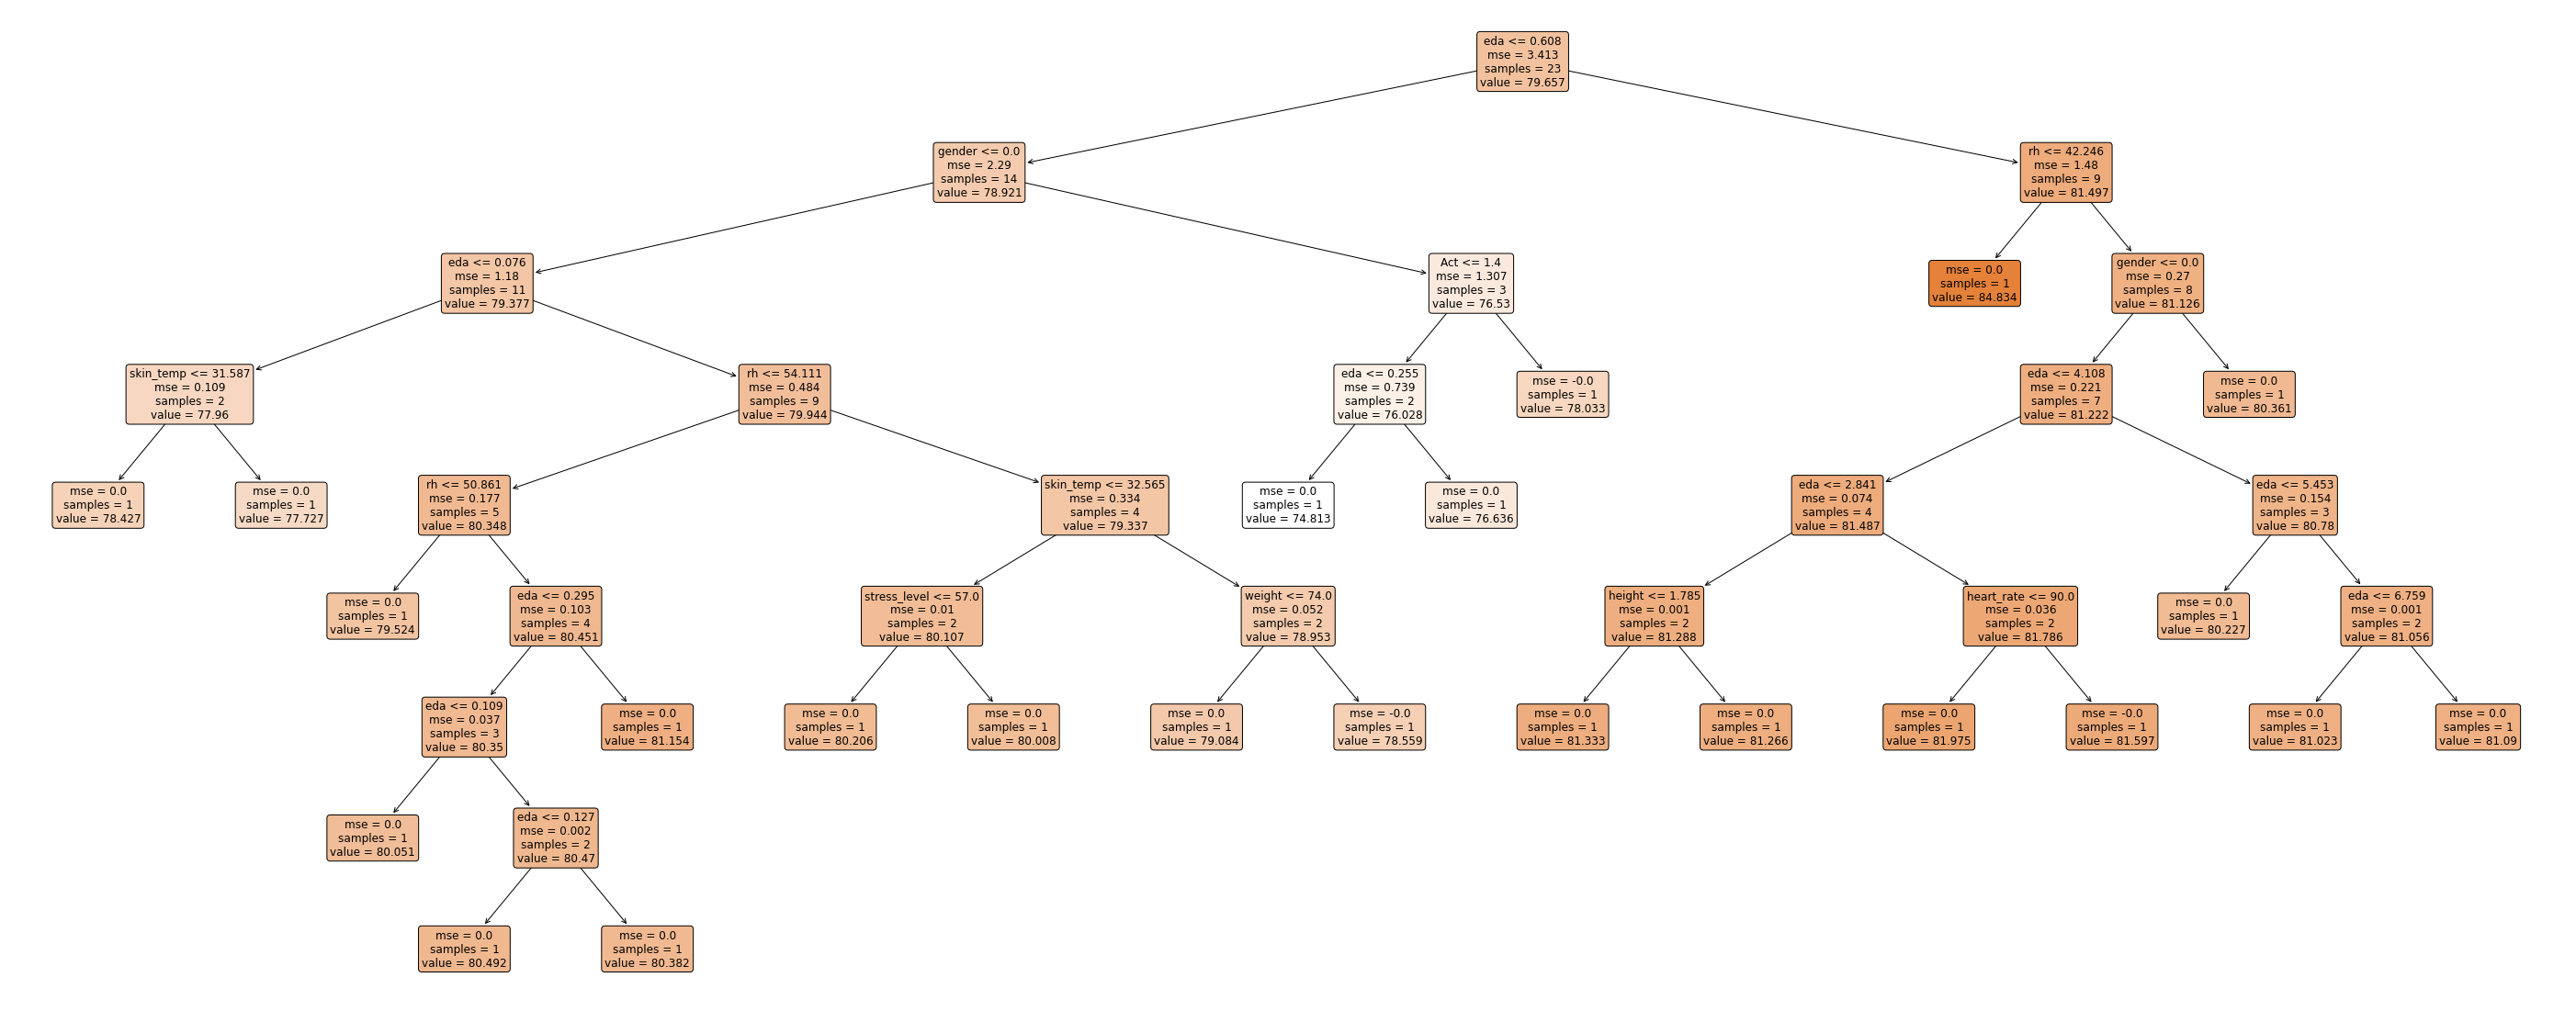

In [38]:
plt.rcParams["figure.figsize"] = (50, 20)
a_tree = tree.plot_tree(rfr_best.estimators_[0], 
                        feature_names=X_data.columns, 
                        rounded=True,
                        filled=True,
                        fontsize=12)

## test

In [39]:
y_pred_test = rfr_best.predict(X_test)

In [40]:
y_pred_test

array([79.485776  , 80.85504667, 78.79232933, 80.533886  , 80.40944667,
       76.65071133, 78.92736267, 80.15540333, 78.871312  ])

In [41]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

,Actual,Predicted
37,79.480,79.485776
41,80.911,80.855047
12,78.645,78.792329
5,81.023,80.533886
43,80.272,80.409447
26,72.696,76.650711
6,79.480,78.927363
8,79.480,80.155403
7,76.725,78.871312


In [42]:
# mean squared error
mean_squared_error(y_test, y_pred_test)

2.3656631975030655

In [43]:
# R2 score
r2_score(y_test, y_pred_test)

0.6094406330715989

## save test dataset

In [44]:
test_df = X_test.copy()

In [45]:
test_df['env_temp'] = 0

In [46]:
test_df['env_temp'] = y_test

In [47]:
test_df.to_csv('../processed_data/test_max.csv')

In [48]:
test_df

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
37,1.77,58.0,-1.0,18.513199,23.0,53.124,92.500000,67.000000,32.682000,0.077406,0.36,1.3,79.480
41,1.74,65.0,-1.0,21.469150,23.0,46.390,68.000000,62.485294,33.044000,0.223055,0.31,1.8,80.911
12,1.77,58.0,-1.0,18.513199,23.0,52.903,86.000000,46.000000,31.719000,0.066685,0.36,1.3,78.645
5,1.77,90.0,-1.0,28.727377,28.0,61.638,91.000000,83.000000,33.250000,8.697113,0.36,1.1,81.023
43,1.77,58.0,-1.0,18.513199,23.0,51.234,102.500000,78.000000,33.636000,0.585949,0.36,1.3,80.272
26,1.60,52.5,1.0,20.507812,24.0,51.538,88.158537,62.485294,32.559814,-0.100261,0.53,1.0,72.696
6,1.77,58.0,-1.0,18.513199,23.0,55.272,87.000000,62.485294,32.915000,0.006857,0.36,1.0,79.480
8,1.77,90.0,-1.0,28.727377,28.0,60.389,67.000000,62.485294,31.013000,0.188456,0.36,1.1,79.480
7,1.77,58.0,-1.0,18.513199,23.0,50.237,99.000000,54.000000,31.588000,0.017909,0.36,1.3,76.725
